# INSURENCE CLAIM FRAUD PREDICTION

Submitted by:Sucharitha A M
             1829 batch

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_curve,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

# Examining the Data

In [2]:
df = pd.read_csv('Insurence claim.csv')
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

This method print the information about the DataFrame including the index type and column type,non-null values and memory usage.

In [4]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
df.shape

(1000, 40)

Here Dataset contains 1000 rows and 40 columns

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Here Dataset contains 40 columns

# Summary statistics

In [7]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

1 The mean is more than median 50% percentile in all columns.

2 There is a large difference in 75% percentile 

3 The 1 and 2 observation suggest that there are extreme outliers present in these three columns.

In [8]:
df.fraud_reported.unique()

array(['Y', 'N'], dtype=object)

Target/dependent variables is discrete and categorial in nature


In [9]:
df.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Dataset contains some categorical value name fraud_reported

# Data visualizations

<AxesSubplot:xlabel='months_as_customer', ylabel='count'>

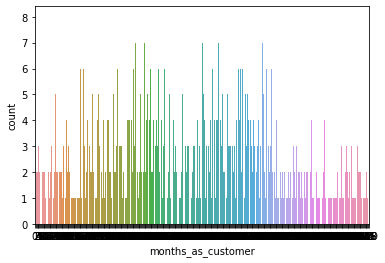

In [10]:
sns.countplot(df['months_as_customer'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='age', ylabel='count'>

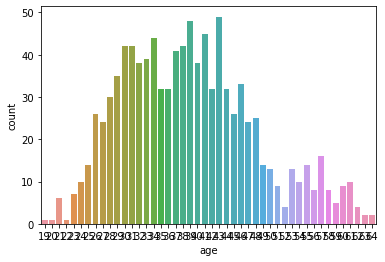

In [11]:
sns.countplot(df['age'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='policy_number', ylabel='count'>

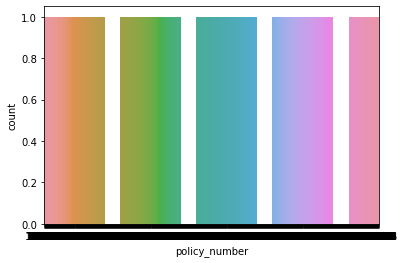

In [12]:
sns.countplot(df['policy_number'])

Here Data in  normally distributed in the all columns.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

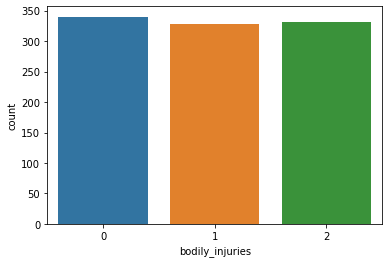

In [13]:
sns.countplot(df['bodily_injuries'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='witnesses', ylabel='count'>

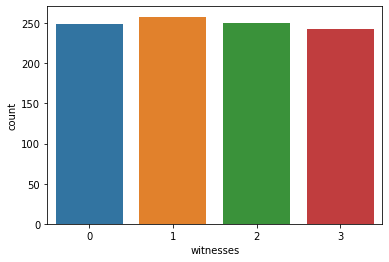

In [14]:
sns.countplot(df['witnesses'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='auto_year', ylabel='count'>

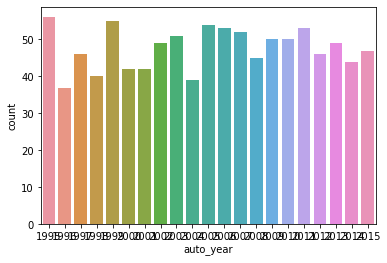

In [15]:
sns.countplot(df['auto_year'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:xlabel='auto_year', ylabel='count'>

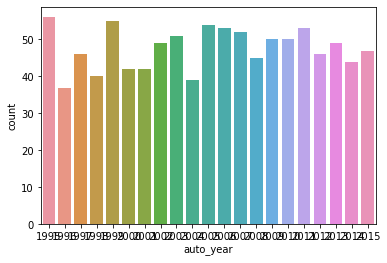

In [16]:
sns.countplot(df['auto_year'])

Here Data in not normally distributed in the all columns.

<AxesSubplot:>

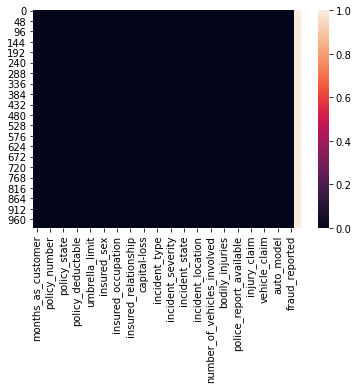

In [17]:
sns.heatmap(df.isnull())

Here heatmap contains all the nullvalues of the dataset.

In [18]:
dfcor=df.corr()
dfcor

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   
_c39                                        NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   
_c39                                       NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651 

<AxesSubplot:>

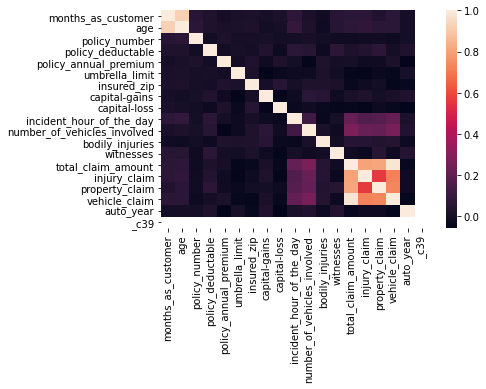

In [19]:
sns.heatmap(dfcor)

Here heatmap containes the difference of corresponding values of dataset.

Light shades are higly corrolated

<AxesSubplot:>

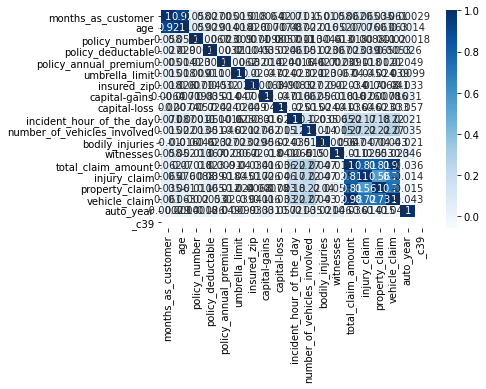

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

Dark shades are higly correlated

<AxesSubplot:>

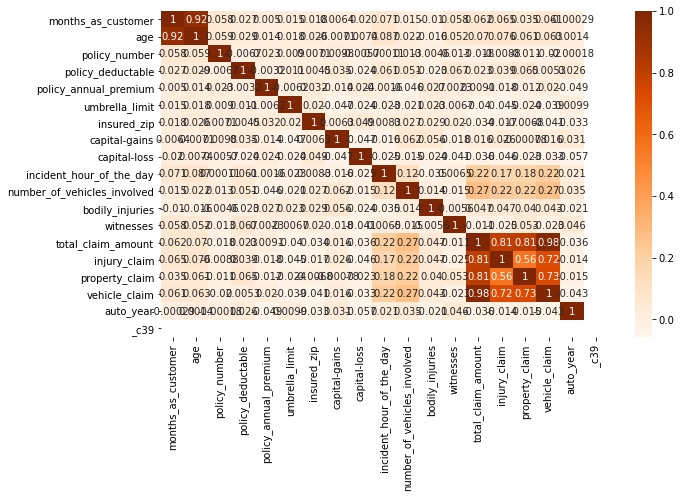

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='Oranges',annot=True)

Light shades are higly correlated

_c39 is higly correlated with auto_year

auto_year is highly negatively correlated with injury_claim

injury_claim is higly positively correlated with number_of_vehical_involved

 age is negatively correlated with _c39

capital-gains a is highly correlated with capital-loss


# Plotting outliers

In [22]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

<AxesSubplot:>

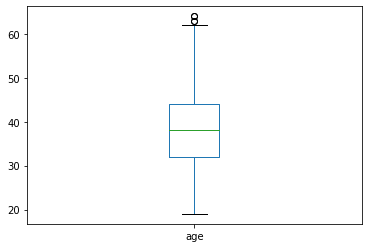

In [23]:
df['age'].plot.box()

Here  boxplot have outside the viscous so we can find here outliers easily.

<AxesSubplot:>

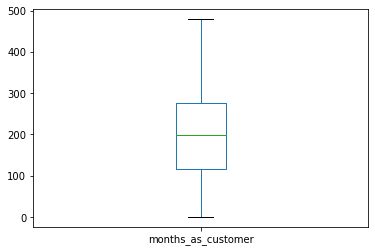

In [24]:
df['months_as_customer'].plot.box()

Here  boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

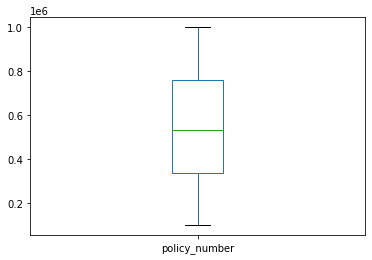

In [25]:
df['policy_number'].plot.box()

Here  boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

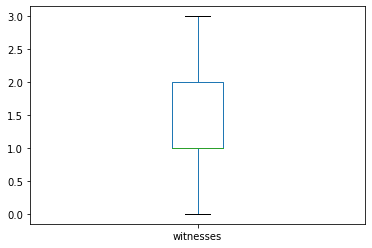

In [26]:
df['witnesses'].plot.box()

Here  boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

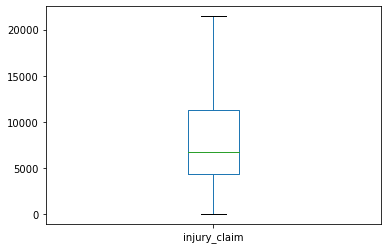

In [27]:
df['injury_claim'].plot.box()

Here  boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

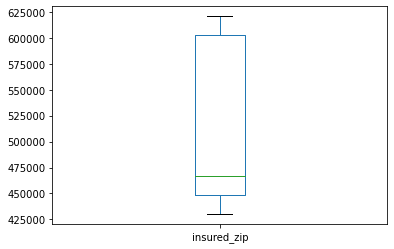

In [28]:
df['insured_zip'].plot.box()

Here  boxplot have no outside the viscous so we cant find here outliers easily.

<AxesSubplot:>

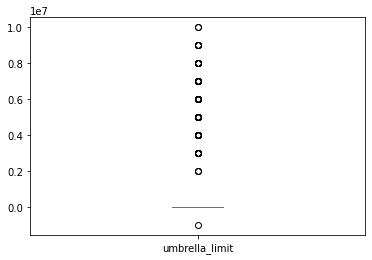

In [29]:
df['umbrella_limit'].plot.box()

Here  boxplot have  outside the viscous so we can find here outliers easily.

<AxesSubplot:>

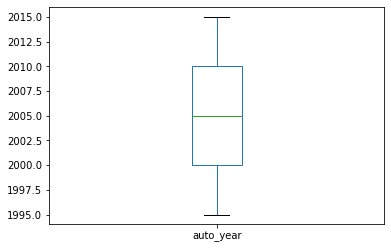

In [30]:
df['auto_year'].plot.box()

Here  boxplot have no outside the viscous so we cant find here outliers easily.

In [31]:
df.shape

(1000, 40)

Dataset Contains 1000 rows and 40 columns

# To check distribution of skewness

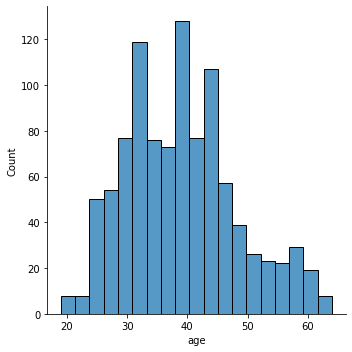

In [32]:
sns.displot(df['age'])

Data is not normally distributed in this columns.

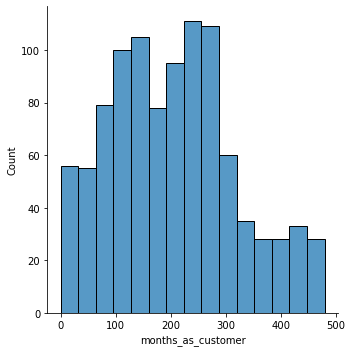

In [33]:
sns.displot(df['months_as_customer'])

Data is not normally distributed in this columns.

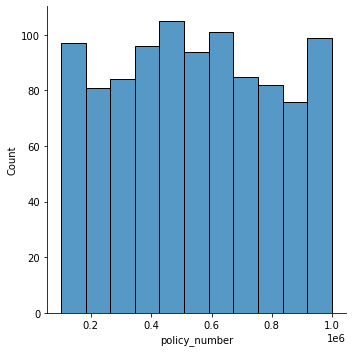

In [34]:
sns.displot(df['policy_number'])

Data is not normally distributed in this columns.

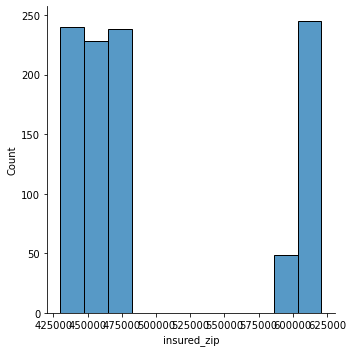

In [35]:
sns.displot(df['insured_zip'])

Data is not normally distributed in this columns.

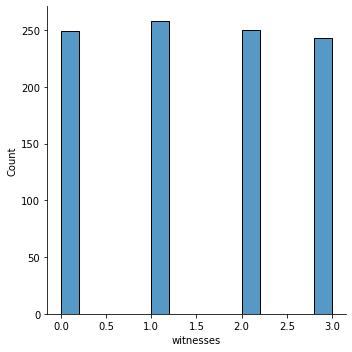

In [36]:
sns.displot(df['witnesses'])

Data is not normally distributed in this columns.

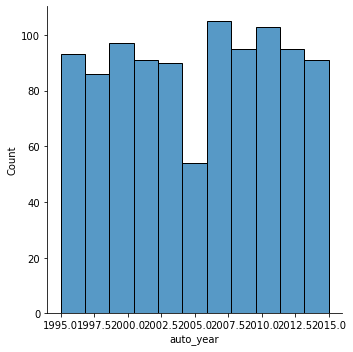

In [37]:
sns.displot(df['auto_year'])

Data is not normally distributed in this columns.

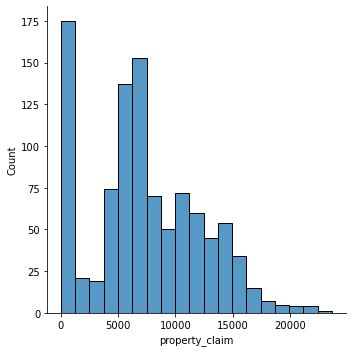

In [38]:
sns.displot(df['property_claim'])

Data is not normally distributed in this columns.

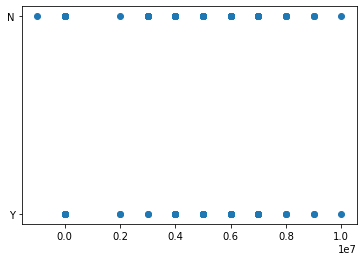

In [39]:
plt.scatter(df['umbrella_limit'],df['fraud_reported'])

Here scatter the plot of umbrella_limit and fraud_reported

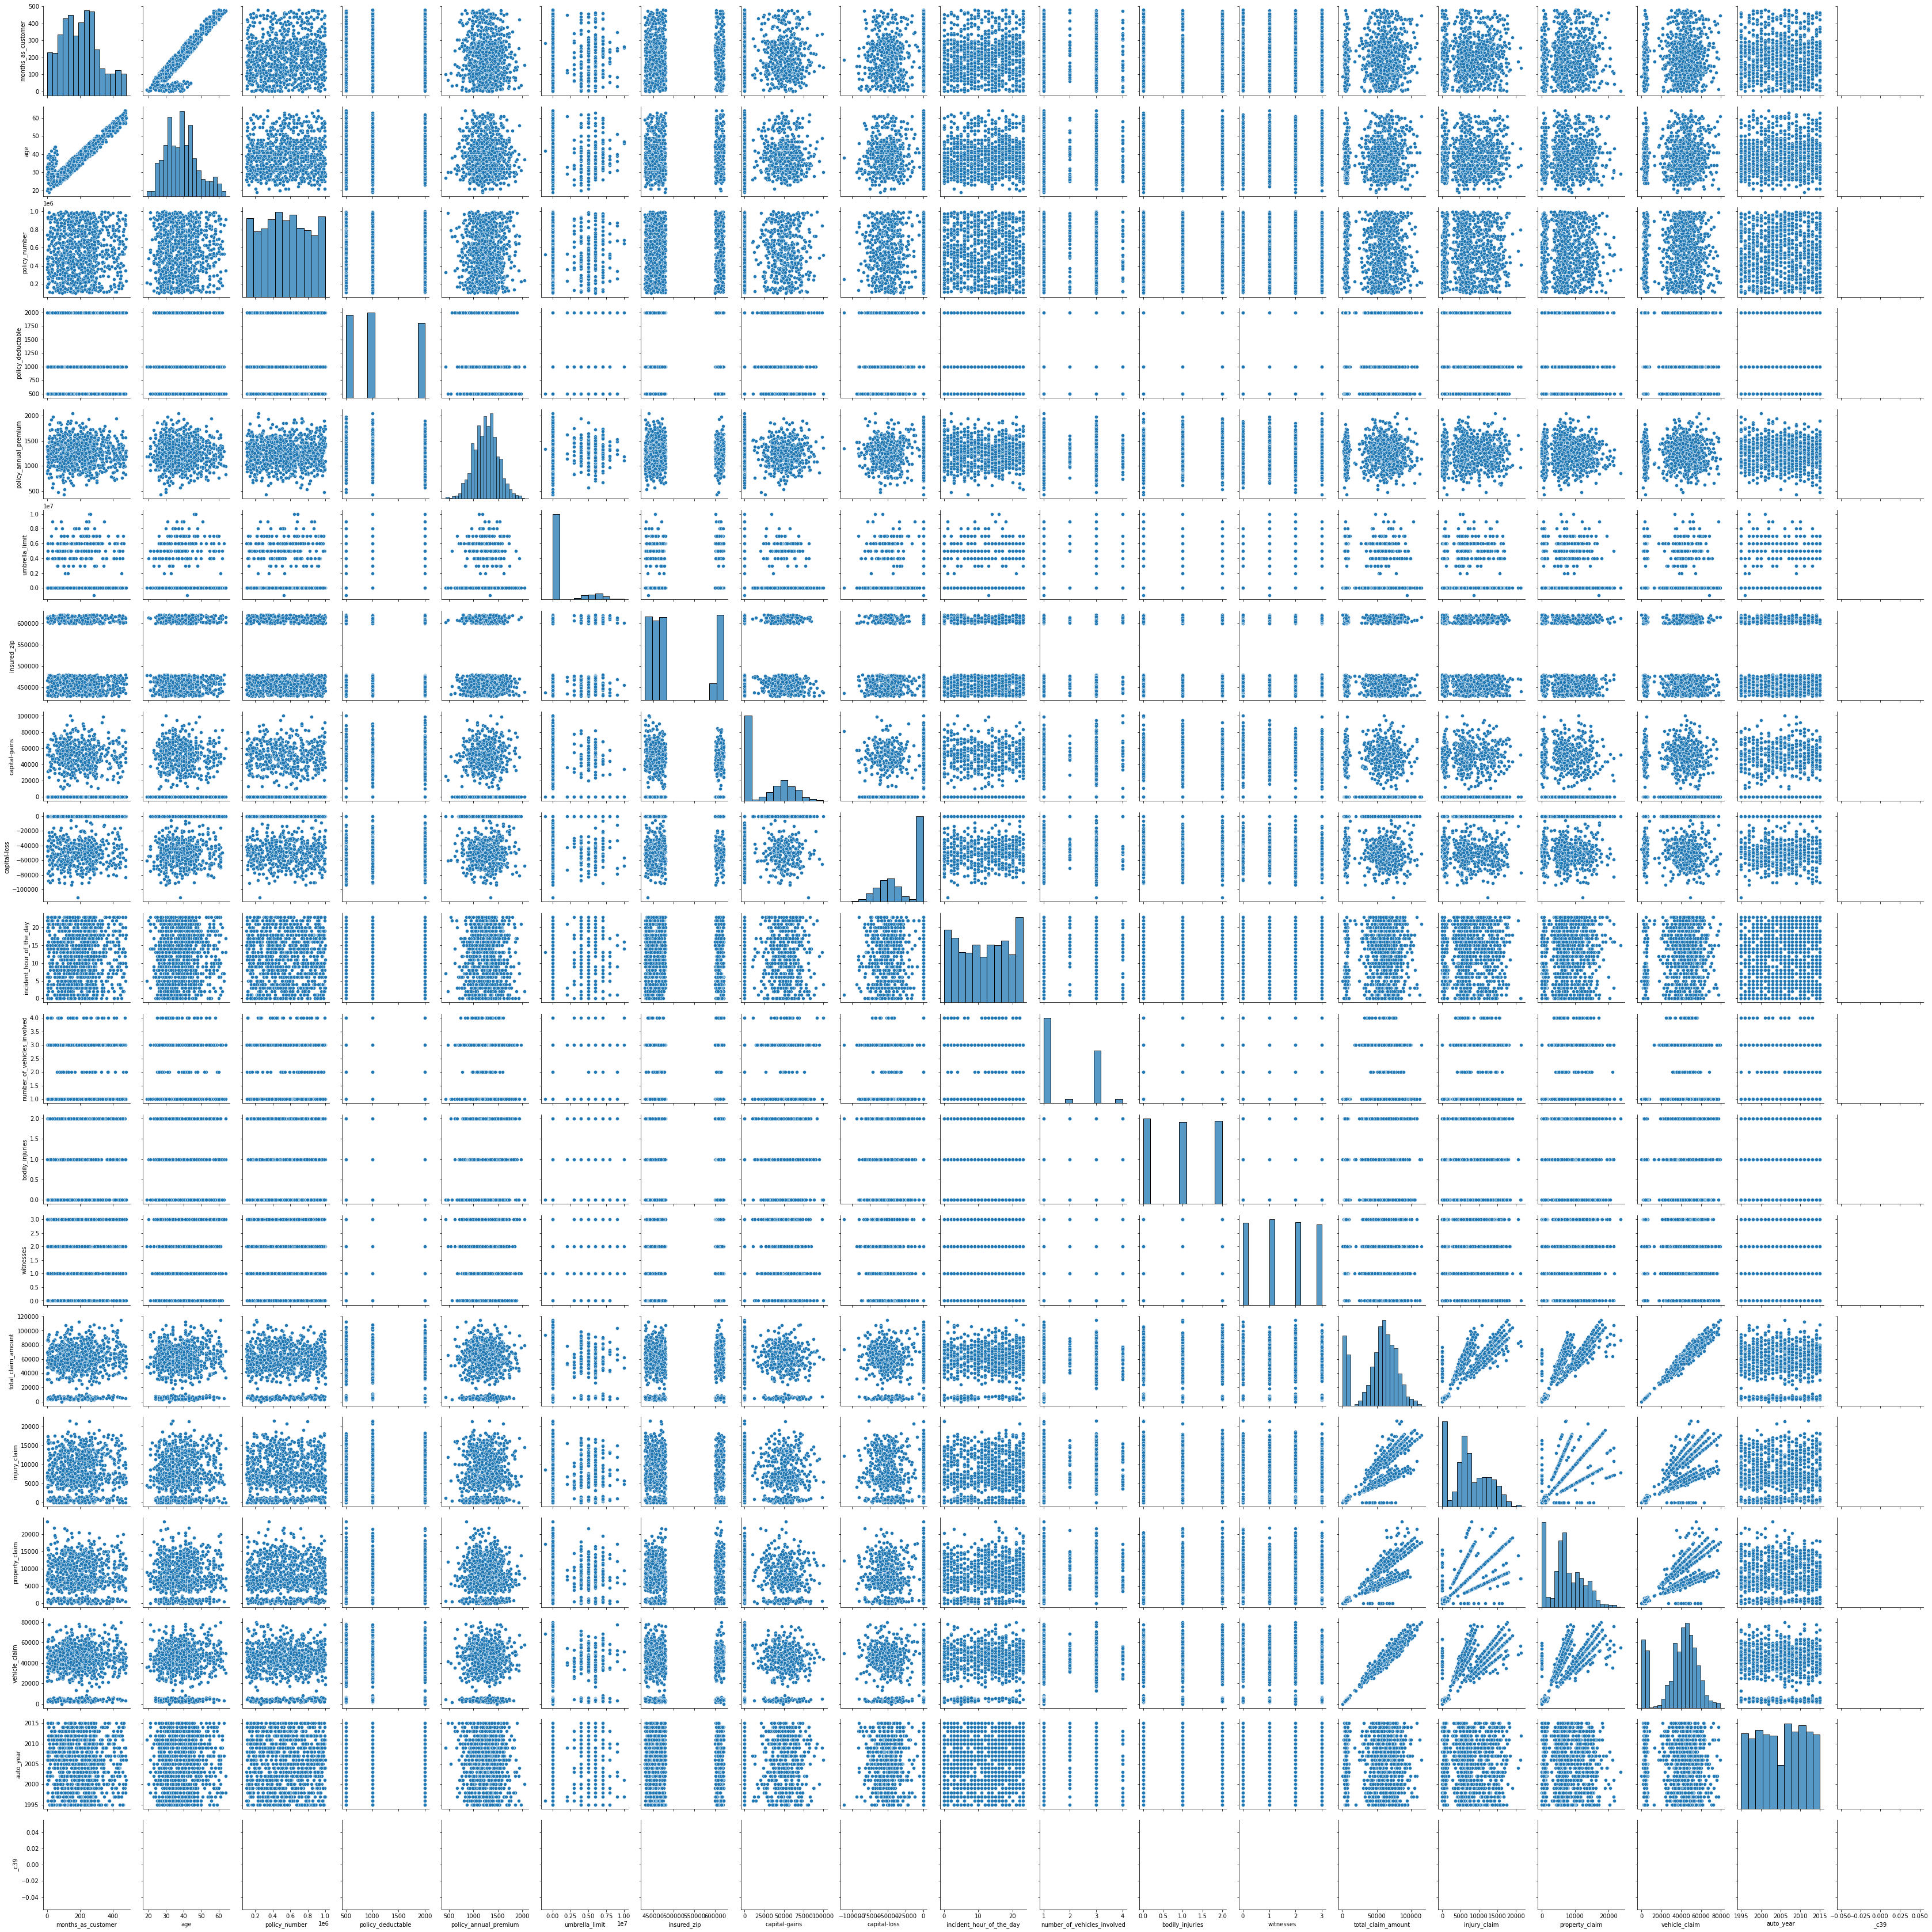

In [40]:
sns.pairplot(df)

Remove the missing values.

drop  the nahativitycorrelated columns.

remove the outliers.

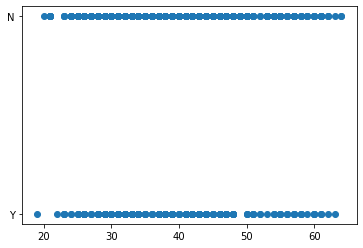

In [41]:
plt.scatter(df['age'],df['fraud_reported'])
plt.show()

Here scatter the plot of age and fraud_reported

In [42]:
df.drop('age',axis=1,inplace=True)

In [43]:
df.head()

months_as_customer  policy_number policy_bind_date policy_state policy_csl  \
0                 328         521585       17-10-2014           OH    250/500   
1                 228         342868       27-06-2006           IN    250/500   
2                 134         687698       06-09-2000           OH    100/300   
3                 256         227811       25-05-1990           IL    250/500   
4                 228         367455       06-06-2014           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... police_report_available total_claim_amount injury_claim  \
0        MALE  ...                     YES              71610         6510   
1        MALE  ...                       ?               5070          780   
2      FEMALE  ...                      NO              34650         7700   
3      FEMALE  ...                      NO              63400         6340   
4        MALE  ...                      NO               6500         1300   

  property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          13020          52080       Saab        92x      2004   
1            780           3510   Mercedes       E400      2007   
2           3850          23100      Dodge        RAM      2007   
3           6340          50720  Chevrolet      Tahoe      2014   
4            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

Dataset contains contains 5 rows and 39 columns

In [44]:
df.shape

(1000, 39)

Here Dataset contains 1000 rows and 39 columns

In [45]:
df.columns

Index(['months_as_customer', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Dataset contains 39 columns

# Encoding Method

In [46]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['policy_state']=LE.fit_transform(df['policy_state'])


In [47]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex  ... police_report_available total_claim_amount  \
0       466132        MALE  ...                     YES              71610   
1       468176        MALE  ...                       ?               5070   
2       430632      FEMALE  ...                      NO              34650   
3       608117      FEMALE  ...                      NO              63400   
4       610706        MALE  ...                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [48]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['insured_sex']=LE.fit_transform(df['insured_sex'])


In [49]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                     YES              71610   
1       468176            1  ...                       ?               5070   
2       430632            0  ...                      NO              34650   
3       608117            0  ...                      NO              63400   
4       610706            1  ...                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [50]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['police_report_available']=LE.fit_transform(df['police_report_available'])


In [51]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['auto_make']=LE.fit_transform(df['auto_make'])


In [53]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080         10        92x      2004   
1          780            780           3510          8       E400      2007   
2         7700           3850          23100          4        RAM      2007   
3         6340           6340          50720          3      Tahoe      2014   
4         1300            650           4550          0        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [54]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['auto_model']=LE.fit_transform(df['auto_model'])


In [55]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080         10          1      2004   
1          780            780           3510          8         12      2007   
2         7700           3850          23100          4         30      2007   
3         6340           6340          50720          3         34      2014   
4         1300            650           4550          0         31      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [56]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['fraud_reported']=LE.fit_transform(df['fraud_reported'])


In [57]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080         10          1      2004   
1          780            780           3510          8         12      2007   
2         7700           3850          23100          4         30      2007   
3         6340           6340          50720          3         34      2014   
4         1300            650           4550          0         31      2009   

  fraud_reported _c39  
0              1  NaN  
1              1  NaN  
2              0  NaN  
3              1  NaN  
4              0  NaN  

[5 rows x 39 columns]

In [58]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['_c39']=LE.fit_transform(df['_c39'])


In [59]:
df.head()

months_as_customer  policy_number policy_bind_date  policy_state  \
0                 328         521585       17-10-2014             2   
1                 228         342868       27-06-2006             1   
2                 134         687698       06-09-2000             2   
3                 256         227811       25-05-1990             0   
4                 228         367455       06-06-2014             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080         10          1      2004   
1          780            780           3510          8         12      2007   
2         7700           3850          23100          4         30      2007   
3         6340           6340          50720          3         34      2014   
4         1300            650           4550          0         31      2009   

  fraud_reported _c39  
0              1    0  
1              1  657  
2              0  658  
3              1  659  
4              0  660  

[5 rows x 39 columns]

In [60]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['policy_bind_date']=LE.fit_transform(df['policy_bind_date'])


In [61]:
df.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 328         521585               532             2   
1                 228         342868               821             1   
2                 134         687698               186             2   
3                 256         227811               766             0   
4                 228         367455               181             0   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080         10          1      2004   
1          780            780           3510          8         12      2007   
2         7700           3850          23100          4         30      2007   
3         6340           6340          50720          3         34      2014   
4         1300            650           4550          0         31      2009   

  fraud_reported _c39  
0              1    0  
1              1  657  
2              0  658  
3              1  659  
4              0  660  

[5 rows x 39 columns]

In [62]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['policy_csl']=LE.fit_transform(df['policy_csl'])


In [63]:
df.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 328         521585               532             2   
1                 228         342868               821             1   
2                 134         687698               186             2   
3                 256         227811               766             0   
4                 228         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91               0   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  insured_sex  ... police_report_available total_claim_amount  \
0       466132            1  ...                       2              71610   
1       468176            1  ...                       0               5070   
2       430632            0  ...                       1              34650   
3       608117            0  ...                       1              63400   
4       610706            1  ...                       1               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080         10          1      2004   
1          780            780           3510          8         12      2007   
2         7700           3850          23100          4         30      2007   
3         6340           6340          50720          3         34      2014   
4         1300            650           4550          0         31      2009   

  fraud_reported _c39  
0              1    0  
1              1  657  
2              0  658  
3              1  659  
4              0  660  

[5 rows x 39 columns]

In [64]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['insured_education_level']=LE.fit_transform(df['insured_education_level'])


In [65]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['insured_occupation']=LE.fit_transform(df['insured_occupation'])


In [66]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['insured_hobbies']=LE.fit_transform(df['insured_hobbies'])


In [67]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['insured_relationship']=LE.fit_transform(df['insured_relationship'])


In [68]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_type']=LE.fit_transform(df['incident_type'])


In [69]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['capital-gains']=LE.fit_transform(df['capital-gains'])


In [70]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['capital-loss']=LE.fit_transform(df['capital-loss'])


In [71]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_date']=LE.fit_transform(df['incident_date'])


In [72]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['collision_type']=LE.fit_transform(df['collision_type'])


In [73]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_severity']=LE.fit_transform(df['incident_severity'])


In [74]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['authorities_contacted']=LE.fit_transform(df['authorities_contacted'])


In [75]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_state']=LE.fit_transform(df['incident_state'])


In [76]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_city']=LE.fit_transform(df['incident_city'])


In [77]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_location']=LE.fit_transform(df['incident_location'])


In [78]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['incident_hour_of_the_day']=LE.fit_transform(df['incident_hour_of_the_day'])


In [79]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['number_of_vehicles_involved']=LE.fit_transform(df['number_of_vehicles_involved'])


In [80]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['property_damage']=LE.fit_transform(df['property_damage'])


In [81]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['bodily_injuries']=LE.fit_transform(df['bodily_injuries'])


In [82]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['witnesses']=LE.fit_transform(df['witnesses'])


In [83]:
df.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 328         521585               532             2   
1                 228         342868               821             1   
2                 134         687698               186             2   
3                 256         227811               766             0   
4                 228         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91               0   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  insured_sex  ...  police_report_available  total_claim_amount  \
0       466132            1  ...                        2               71610   
1       468176            1  ...                        0                5070   
2       430632            0  ...                        1               34650   
3       608117            0  ...                        1               63400   
4       610706            1  ...                        1                6500   

   injury_claim  property_claim  vehicle_claim  auto_make  auto_model  \
0          6510           13020          52080         10           1   
1           780             780           3510          8          12   
2          7700            3850          23100          4          30   
3          6340            6340          50720          3          34   
4          1300             650           4550          0          31   

   auto_year  fraud_reported  _c39  
0       2004               1     0  
1       2007               1   657  
2       2007               0   658  
3       2014               1   659  
4       2009               0   660  

[5 rows x 39 columns]

# Removing Outliers

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.07813958, 0.09595307, 0.20949985, ..., 0.1834404 , 1.74601919,
        1.73031962],
       [0.2089946 , 0.79152739, 1.25939678, ..., 0.31549088, 1.74601919,
        0.54559628],
       [0.60800168, 0.55056594, 1.04747018, ..., 0.31549088, 0.57273139,
        0.54906038],
       ...,
       [0.64276748, 1.44891961, 0.12594404, ..., 1.5139238 , 0.57273139,
        0.55598859],
       [2.20802805, 0.04786687, 0.35844716, ..., 1.18130295, 0.57273139,
        1.51208111],
       [2.19064515, 0.03830297, 0.41898517, ..., 0.31549088, 0.57273139,
        1.73031962]])

Here removing the outlier of df

In [85]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 875, 922, 975], dtype=int64), array([ 7,  7,  7,  7,  7,  6,  6,  7,  7,  7,  7, 32,  7,  7,  7,  6,  7,
        7,  7], dtype=int64))


In [86]:
df_new=df[(z<3).all(axis=1)]
df_new

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                   328         521585               532             2   
1                   228         342868               821             1   
2                   134         687698               186             2   
3                   256         227811               766             0   
4                   228         367455               181             0   
..                  ...            ...               ...           ...   
995                   3         941851               487             2   
996                 285         186934               129             0   
997                 130         918516               509             2   
998                 458         533940               573             0   
999                 456         556080               359             2   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0             1               1000                1406.91               0   
1             1               2000                1197.22         5000000   
2             0               2000                1413.14         5000000   
3             1               2000                1415.74         6000000   
4             2               1000                1583.91         6000000   
..          ...                ...                    ...             ...   
995           2               1000                1310.80               0   
996           0               1000                1436.79               0   
997           1                500                1383.49         3000000   
998           2               2000                1356.92         5000000   
999           1               1000                 766.19               0   

     insured_zip  insured_sex  ...  police_report_available  \
0         466132            1  ...                        2   
1         468176            1  ...                        0   
2         430632            0  ...                        1   
3         608117            0  ...                        1   
4         610706            1  ...                        1   
..           ...          ...  ...                      ...   
995       431289            0  ...                        0   
996       608177            0  ...                        0   
997       442797            0  ...                        2   
998       441714            1  ...                        2   
999       612260            0  ...                        0   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
0                 71610          6510           13020          52080   
1                  5070           780             780           3510   
2                 34650          7700            3850          23100   
3                 63400          6340            6340          50720   
4                  6500          1300             650           4550   
..                  ...           ...             ...            ...   
995               87200         17440            8720          61040   
996              108480         18080           18080          72320   
997               67500          7500            7500          52500   
998               46980          5220            5220          36540   
999                5060           460             920           3680   

     auto_make  auto_model  auto_year  fraud_reported  _c39  
0           10           1       2004               1     0  
1            8          12       2007               1   657  
2            4          30       2007               0   658  
3            3          34       2014               1   659  
4            0          31       2009               0   660  
..         ...         ...        ...             ...   ...  
995          6           6       2006               0   337  
996         13          28       2015               0   338  
997        

Here new dataset contains 981 rows and 39 columns

In [87]:
df.shape

(1000, 39)

Dataset contains 1000 rows and 39 columns

In [88]:
df_new.shape

(981, 39)

New Dataset contains 981 rows and 39 columns

# StandardScaler Method

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledX = scaler.fit_transform(df)

In [90]:
scaledX

array([[ 1.07813958, -0.09595307,  0.20949985, ..., -0.1834404 ,
         1.74601919, -1.73031962],
       [ 0.2089946 , -0.79152739,  1.25939678, ...,  0.31549088,
         1.74601919,  0.54559628],
       [-0.60800168,  0.55056594, -1.04747018, ...,  0.31549088,
        -0.57273139,  0.54906038],
       ...,
       [-0.64276748,  1.44891961,  0.12594404, ..., -1.5139238 ,
        -0.57273139, -0.55598859],
       [ 2.20802805, -0.04786687,  0.35844716, ..., -1.18130295,
        -0.57273139,  1.51208111],
       [ 2.19064515,  0.03830297, -0.41898517, ...,  0.31549088,
        -0.57273139,  1.73031962]])

Here StandardScaler Value of the ScaledX

In [91]:
from sklearn.decomposition import PCA

testpca = PCA()
Y = testpca.fit(scaledX)

In [92]:
Y.explained_variance_ratio_

array([1.13450058e-01, 4.29579868e-02, 3.71203652e-02, 3.38641856e-02,
       3.25226125e-02, 3.21819432e-02, 3.10614881e-02, 3.04122715e-02,
       3.00629515e-02, 2.93311212e-02, 2.85267641e-02, 2.82536642e-02,
       2.79412103e-02, 2.72875152e-02, 2.70677586e-02, 2.62235346e-02,
       2.60471298e-02, 2.54559027e-02, 2.48897616e-02, 2.48440560e-02,
       2.40031328e-02, 2.34586369e-02, 2.31982883e-02, 2.29322636e-02,
       2.18713465e-02, 2.17002761e-02, 2.09989558e-02, 2.06701361e-02,
       2.04033281e-02, 1.96014805e-02, 1.94651421e-02, 1.84559811e-02,
       1.81206365e-02, 1.40642475e-02, 1.27478713e-02, 1.06568412e-02,
       5.49632142e-03, 2.65283341e-03, 2.23740789e-32])

In [93]:
var_cumu = np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 11.34500581,  15.64080448,  19.35284101,  22.73925957,
        25.99152082,  29.20971515,  32.31586395,  35.3570911 ,
        38.36338625,  41.29649838,  44.14917478,  46.9745412 ,
        49.76866223,  52.49741375,  55.2041896 ,  57.82654306,
        60.43125604,  62.97684631,  65.46582247,  67.95022807,
        70.35054135,  72.69640504,  75.01623387,  77.30946023,
        79.49659488,  81.6666225 ,  83.76651807,  85.83353168,
        87.87386449,  89.83401254,  91.78052675,  93.62612487,
        95.43818852,  96.84461327,  98.1194004 ,  99.18508452,
        99.73471666, 100.        , 100.        ])

In [94]:
k = np.argmax(var_cumu>99)
print("Number of components explaining 99% variance:",k)

Number of components explaining 99% variance: 35


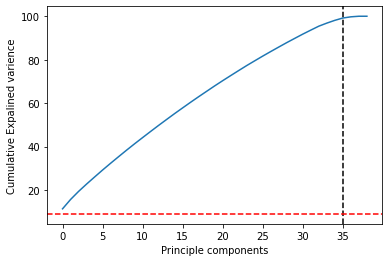

In [95]:
plt.ylabel('Cumulative Expalined varience')
plt.xlabel('Principle components')
plt.axvline(x=k, color="k",linestyle="--")
plt.axhline(y=9, color="r",linestyle="--")

plt.plot(var_cumu)
plt.show()

Here the plot contains x axis is principle components and y axis contains cumulative expalined varience

# Missing Value Hnadling Method

In [96]:
df.isnull().sum()

months_as_customer             0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

Dataset contains sum of all null values will be zero

In [97]:
df["auto_make"]=df["auto_make"].fillna(df["auto_make"].mean())
df["auto_model"]=df["auto_model"].fillna(df["auto_model"].median())


In [98]:
df.isnull().sum()

months_as_customer             0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

# Checking Skewness

In [99]:
df.skew()

months_as_customer             0.362177
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.894996
capital-loss                  -0.810352
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584


Dataset contains the skew values

# Model Building

In [100]:
x_train=df.drop("fraud_reported",axis=1)
y_train=df["fraud_reported"]

In [101]:
x_train.head()

months_as_customer  policy_number  policy_bind_date  policy_state  \
0                 328         521585               532             2   
1                 228         342868               821             1   
2                 134         687698               186             2   
3                 256         227811               766             0   
4                 228         367455               181             0   

   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0           1               1000                1406.91               0   
1           1               2000                1197.22         5000000   
2           0               2000                1413.14         5000000   
3           1               2000                1415.74         6000000   
4           2               1000                1583.91         6000000   

   insured_zip  insured_sex  ...  witnesses  police_report_available  \
0       466132            1  ...          2                        2   
1       468176            1  ...          0                        0   
2       430632            0  ...          3                        1   
3       608117            0  ...          2                        1   
4       610706            1  ...          1                        1   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  auto_year  _c39  
0           1       2004     0  
1          12       2007   657  
2          30       2007   658  
3          34       2014   659  
4          31       2009   660  

[5 rows x 38 columns]

Here x_train dataset contains 5 rows and 38 columns

In [102]:
y_train.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int32

y_train dataset contains  fraud_reported 

In [103]:
x_train.shape

(1000, 38)

x_train contains 1000 rows and 38 columns

In [104]:
y_train.shape

(1000,)

y_train contains 1000 rows and zero columns

# Classifier Methods

In [105]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [106]:
x=df.drop("fraud_reported",axis=1)
y=df["fraud_reported"]
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=50, test_size=0.2)

In [107]:
for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
    from sklearn.tree import DecisionTreeClassifier
    lm=DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    accu=accuracy_score(y_test,pred)
    print(accu*100,"at random_state", i)

83.63636363636363 at random_state 0
79.6969696969697 at random_state 1
77.57575757575758 at random_state 2
76.96969696969697 at random_state 3
80.60606060606061 at random_state 4
80.3030303030303 at random_state 5
80.0 at random_state 6
78.78787878787878 at random_state 7
78.48484848484848 at random_state 8
76.66666666666667 at random_state 9
78.78787878787878 at random_state 10
75.75757575757575 at random_state 11
79.39393939393939 at random_state 12
81.51515151515152 at random_state 13
82.72727272727273 at random_state 14
79.6969696969697 at random_state 15
80.60606060606061 at random_state 16
81.81818181818183 at random_state 17
78.78787878787878 at random_state 18
77.27272727272727 at random_state 19
78.18181818181819 at random_state 20
80.3030303030303 at random_state 21
76.96969696969697 at random_state 22
79.39393939393939 at random_state 23
76.36363636363637 at random_state 24
79.6969696969697 at random_state 25
82.42424242424242 at random_state 26
78.18181818181819 at random_s

In [108]:
from sklearn.tree import DecisionTreeClassifier
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=1
print("Best accuracy is",maxAccu," on Random_state",maxRS)        


Best accuracy is 0.83  on Random_state 1


In [109]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
print("Decision Tree Classifier: \n\n",classification_report(y_test,y_pred_dt))
print("Test Accuracy:{}%".format(round(dt.score(x_test,y_test)*100,2)))

Decision Tree Classifier: 

               precision    recall  f1-score   support

           0       0.86      0.83      0.84       229
           1       0.50      0.56      0.53        71

    accuracy                           0.76       300
   macro avg       0.68      0.69      0.69       300
weighted avg       0.77      0.76      0.77       300

Test Accuracy:76.33%


The test Accuracy of DecisionTressClassifier is 77.33%

In [110]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print("Logistic Regression Classifier: \n\n",classification_report(y_test,y_pred_lr))
print("Test Accuracy:{}%".format(round(lr.score(x_test,y_test)*100,2)))

Logistic Regression Classifier: 

               precision    recall  f1-score   support

           0       0.77      0.99      0.86       229
           1       0.40      0.03      0.05        71

    accuracy                           0.76       300
   macro avg       0.58      0.51      0.46       300
weighted avg       0.68      0.76      0.67       300

Test Accuracy:76.0%


The test Accuracy of LogisticRegression is 76%

In [111]:
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    if knn.score(x_test,y_test) > best_score:
                                best_score = knn.score(x_train, y_train)
                                best_Kvalue = i
    print("Best KNN Value:{}".format(best_Kvalue )) 
    print("Test Accuarcy:{}".format(round(best_score*100,2)))

Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0
Best KNN Value:1
Test Accuarcy:100.0


In [112]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(" KNN Classifier: \n\n",classification_report(y_test,y_pred_knn))
print("Test Accuracy:{}%".format(round(knn.score(x_test,y_test)*100,2)))

 KNN Classifier: 

               precision    recall  f1-score   support

           0       0.76      0.93      0.84       229
           1       0.20      0.06      0.09        71

    accuracy                           0.72       300
   macro avg       0.48      0.49      0.46       300
weighted avg       0.63      0.72      0.66       300

Test Accuracy:72.33%


The test Accuarcy of KNeighbors classifier is 72.3%

In [113]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print(" SVM Classifier: \n\n",classification_report(y_test,y_pred_svm))
print("Test Accuracy:{}%".format(round(svm.score(x_test,y_test)*100,2)))

 SVM Classifier: 

               precision    recall  f1-score   support

           0       0.76      1.00      0.87       229
           1       0.00      0.00      0.00        71

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300

Test Accuracy:76.33%


The test Accuracy of SVC is 76.33%

In [114]:
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
print(" Navie byes Classifier: \n\n",classification_report(y_test,y_pred_nb))
print("Test Accuracy:{}%".format(round(nb.score(x_test,y_test)*100,2)))

 Navie byes Classifier: 

               precision    recall  f1-score   support

           0       0.77      0.82      0.79       229
           1       0.25      0.20      0.22        71

    accuracy                           0.67       300
   macro avg       0.51      0.51      0.51       300
weighted avg       0.64      0.67      0.66       300

Test Accuracy:67.0%


The Test Accuracy of nb is 67%

In [115]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print(" Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))

 Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.80      0.89      0.84       229
           1       0.43      0.28      0.34        71

    accuracy                           0.74       300
   macro avg       0.62      0.58      0.59       300
weighted avg       0.71      0.74      0.72       300

Test Accuracy:74.33%


The Accuracy of RandomForestClassifier is 76.33%

# Cross value correction

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7409999999999999


In [118]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.7459999999999999


In [119]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.715


In [120]:
print(cross_val_score(svm,x,y,cv=5).mean())

0.7529999999999999


In [121]:
print(cross_val_score(nb,x,y,cv=5).mean())

0.657


In [122]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.767


# Hyperparameter tunning

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
parameter={'max_depth':np.arange(2,10),
          'criterion':['gini','entropy']}

In [125]:
GCV=GridSearchCV(DecisionTreeClassifier(), parameter,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [127]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 3}

# AUC ROC Curve

In [128]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [129]:
y_pred_dt = dt.predict_proba(x_test)[:,1]
y_pred_dt

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

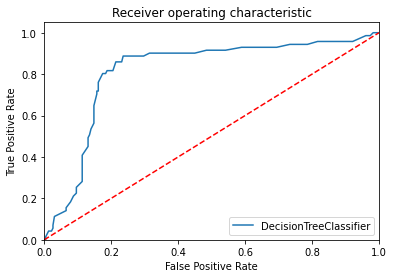

In [130]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
rf_roc_auc = roc_auc_score(y_test, dt.predict(x_test))
fpr,tpr,thersholds = roc_curve(y_test,rf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='DecisionTreeClassifier'%rf_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

Here the plot contains x axis false positive rate and y axis contains true positive rate in the Decisionclassifier curve

# Evalue The Final Model

In [131]:
Final_mod = DecisionTreeClassifier()
Final_mod.fit(x_train,y_train)
pred = Final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.0


# Saving The Model

In [132]:
import joblib
joblib.dump(Final_mod,"FinalModle.pkl")

['FinalModle.pkl']

Here saving the model[FinalModle.pkl]

# Prediction Method

In [133]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
preds = dt.predict(x_test)
print(preds[:36])
print(y_test[:36].values)

[0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1]
[0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1]


The train and test data is balanced most classification methods hit the 78% accuracy with the datset.